<a href="https://colab.research.google.com/github/hardikkamboj/The-SmartBridge/blob/main/Project_3/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [70]:
orig_img = cv2.imread('/content/kl.jpeg')

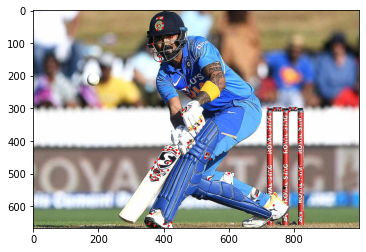

In [71]:
img = np.copy(orig_img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,100,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),3,255,-1)

plt.imshow(img)

In [45]:
corners

array([[[475, 419]],

       [[771, 431]],

       [[383, 520]],

       [[766, 307]],

       [[722, 435]],

       [[724, 648]],

       [[374, 511]],

       [[498, 362]],

       [[413, 427]],

       [[803, 300]],

       [[420, 419]],

       [[536, 440]],

       [[538, 518]],

       [[414, 490]],

       [[448, 439]],

       [[425,  82]],

       [[771, 580]],

       [[395, 492]],

       [[516, 340]],

       [[816, 556]],

       [[398,  54]],

       [[389, 143]],

       [[756, 300]],

       [[426, 428]],

       [[457, 320]],

       [[413, 467]],

       [[773, 394]],

       [[788, 300]],

       [[742, 301]],

       [[720, 301]],

       [[821, 627]],

       [[361, 504]],

       [[378, 486]],

       [[773, 342]],

       [[721, 356]],

       [[357, 654]],

       [[363, 624]],

       [[771, 554]],

       [[814, 535]],

       [[814, 353]],

       [[386, 505]],

       [[723, 517]],

       [[817, 395]],

       [[460, 305]],

       [[769, 384]],

       [[7

In [49]:
points_2d = [corners[i][0] for i in range(100)]
points_2d = np.array(points_2d)
points_2d.shape

(100, 2)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
scores_dict = {}
for num in range(1,15):
  kmeans = KMeans(n_clusters = num)
  kmeans.fit(points_2d)
  scores_dict[num] = kmeans.inertia_

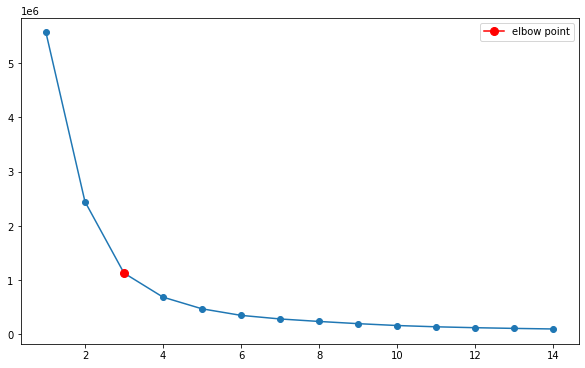

In [58]:
plt.figure(figsize = (10,6))
plt.plot(list(scores_dict.keys()),list(scores_dict.values()),marker = 'o')
plt.plot(3,scores_dict[3],marker = 'o',markersize = 8,c='r',label = 'elbow point')
plt.legend()

In [59]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(points_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
clusters_predicted = kmeans.predict(points_2d)

In [64]:
cluster_0 = points_2d[clusters_predicted == 0]
cluster_1 = points_2d[clusters_predicted == 1]
cluster_2 = points_2d[clusters_predicted == 2]

In [63]:
cluster_0

array([[475, 419],
       [383, 520],
       [374, 511],
       [498, 362],
       [413, 427],
       [420, 419],
       [536, 440],
       [538, 518],
       [414, 490],
       [448, 439],
       [395, 492],
       [516, 340],
       [426, 428],
       [457, 320],
       [413, 467],
       [361, 504],
       [378, 486],
       [357, 654],
       [363, 624],
       [386, 505],
       [460, 305],
       [422, 462],
       [477, 405],
       [416, 660],
       [601, 500],
       [440, 428],
       [387, 474],
       [365, 484],
       [528, 451],
       [375, 465],
       [400, 427],
       [543, 456],
       [424, 650],
       [386, 456],
       [438, 438],
       [372, 660],
       [376, 497],
       [365, 518],
       [401, 655]])

In [87]:
img = np.copy(orig_img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
for i in cluster_0:
    x,y = i.ravel()
    cv2.circle(img,(x,y),10,(255, 0, 0),-1)

for i in cluster_1:
    x,y = i.ravel()
    cv2.circle(img,(x,y),10,(255, 255, 0),-1)

for i in cluster_2:
    x,y = i.ravel()
    cv2.circle(img,(x,y),10,(0, 255, 255),-1)

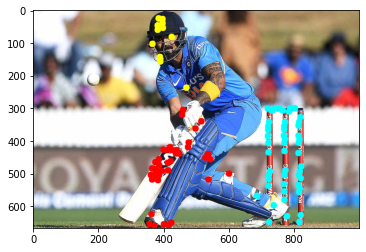

In [88]:
plt.imshow(img)

In [91]:
centres = kmeans.cluster_centers_


array([428.8974359 , 480.92307692])

In [113]:
img = np.copy(orig_img)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
colors = [(255, 0, 0),(255, 255, 0),(0,255, 255)]
for ind,i in enumerate(centres):
    x,y = int(i[0]),int(i[1])
    cv2.rectangle(img,(x-50,y-50),(x+50,y+50),colors[ind],5)

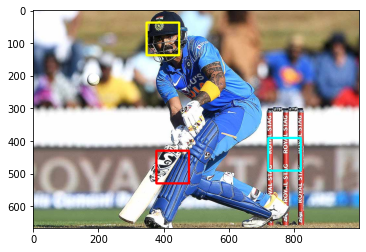

In [114]:
plt.imshow(img)